# Helper functions

In [2]:
# Import
%load_ext autoreload
%autoreload 2

import json
import os
import pandas as pd
import re
import sys
from pathlib import Path

# Add SynFlow to path in order to import modules
repo_root = "../../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
from SynFlow.SCD import print_jsd_by_period, plot_jsd_by_period, plot_items_jsd_by_period

# Analysis

In [3]:
# RSC
target_lemma = 'water'
target_pos = 'N'
keyword_string = f'{target_lemma}\t{target_pos}' # Or you can use the full POS for precision (e.g., {target_lemma}\tNOUN)
period = '1750-1819'
corpus_path = './RSC/1750-1819_che_half_decades'
fname_pattern = re.compile(
    r'Royal_Society_Corpus_open_v6\.0_text_(?P<id>\d+)_(?P<year>\d+)\.txt$'
)

In [4]:
output_folder = Path(f'./')
input_SCD = output_folder / 'input' / 'SCD' /f'{target_lemma}-{target_pos}-{period}'
os.makedirs(input_SCD, exist_ok=True)

### Water

In [5]:
fname_df_pattern = re.compile(
    rf'air/Royal_Society_Corpus_open_v6\.0_text_'   # fixed prefix
    rf'(?P<id>\d+)_'                            # capture numeric ID
    rf'(?P<year>\d+)'                           # capture year
    rf'.txt/\d+$'             #  and extension and line number
)

all_sfillers_df_path = './output/water-N-1750-1819/Explorer/water_samples_sfillerdf_all.csv'

#### Preprocessing

This step is unique to the type of data we're working with.

##### pa_obl

In [5]:
water_paobl_df_path = f'{input_SCD}/water_paobl_1750-1819.csv'
interest_slot = 'pa_obl'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
water_paobl_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=water_paobl_df_path)

In [6]:
# Remove all adjective from the slot-filler column
import pandas as pd
# load dataframe
water_paobl_df = pd.read_csv(water_paobl_df_path)

# keep rows where pa_obl does not end with /A
water_paobl_df = water_paobl_df[~water_paobl_df["pa_obl"].str.endswith("/A']")]

# save if needed
water_paobl_df.to_csv(water_paobl_df_path, index=False)

In [7]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(water_paobl_df_path, 'pa_obl', 5)

,id,subfolder,target,pa_obl
0,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],make/V
1,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],boil/V
2,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],boil/V
3,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],edulcorate/V
4,water/Royal_Society_Corpus_open_v6.0_text_1051...,1750,['water/N'],lie/V
...,...,...,...,...
2796,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],saturate/V
2797,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],pour/V
2798,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],stand/V
2799,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],fill/V


##### pa_nmod

In [8]:
water_panmod_df_path = f'{input_SCD}/water_panmod_1750-1819.csv'
interest_slot = 'pa_nmod'

In [9]:
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
water_panmod_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=water_panmod_df_path)

In [10]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(water_panmod_df_path, 'pa_nmod', 5)

,id,subfolder,target,pa_nmod
0,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],solution/N
1,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],solution/N
2,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],time/N
3,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],affusion/N
4,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],ablution/N
...,...,...,...,...
4148,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],that/P
4149,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],vessel/N
4150,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],temperature/N
4151,water/Royal_Society_Corpus_open_v6.0_text_1075...,1815,['water/N'],heat/N


##### chi_obj

In [11]:
water_pansubjpass_df_path = f'{input_SCD}/water_pansubjpass_1750-1819.csv'
interest_slot = 'pa_nsubj:pass'
# Extract the specific slot-filler column
from SynFlow.Explorer.sfiller_df import extract_1_slot_col
water_pansubhjpass_df = extract_1_slot_col(all_sfillers_df_path, interest_slot, output_path=water_pansubjpass_df_path)

In [12]:
# Filter by minimum frequency. Only use this with df that has 1 slot column
from SynFlow.Explorer.sfiller_df import filter_frequency_sfiller
filter_frequency_sfiller(water_pansubjpass_df_path, 'pa_nsubj:pass', 5)

,id,subfolder,target,pa_nsubj:pass
0,water/Royal_Society_Corpus_open_v6.0_text_1052...,1750,['water/N'],find/V
1,water/Royal_Society_Corpus_open_v6.0_text_1051...,1750,['water/N'],change/V
2,water/Royal_Society_Corpus_open_v6.0_text_1051...,1750,['water/N'],make/V
3,water/Royal_Society_Corpus_open_v6.0_text_1051...,1750,['water/N'],stirr/V
4,water/Royal_Society_Corpus_open_v6.0_text_1051...,1750,['water/N'],heat/V
...,...,...,...,...
481,water/Royal_Society_Corpus_open_v6.0_text_1074...,1815,['water/N'],use/V
482,water/Royal_Society_Corpus_open_v6.0_text_1074...,1815,['water/N'],pour/V
483,water/Royal_Society_Corpus_open_v6.0_text_1074...,1815,['water/N'],bring/V
484,water/Royal_Society_Corpus_open_v6.0_text_1074...,1815,['water/N'],find/V


#### Frequency Changes

In [14]:
from SynFlow.SCD.freq import plot_freq_top_union_sfillers_by_period
slot_type = 'pa_nmod'
slot_df_path = water_panmod_df_path

In [15]:
# Bar chart (absolute freq)
plot_freq_top_union_sfillers_by_period(slot_df_path, 
                              slot_type=slot_type,
                              top_n=10,
                              normalized=True, # Normalised or Raw count
                              time_col='subfolder',
                              )

#### Slot Filler JSD

In [16]:
from SynFlow.SCD.jsd import sfillers_jsd_by_period

In [17]:
sfillers_js_df = pd.read_csv(slot_df_path)
sfillers_js_results = sfillers_jsd_by_period(sfillers_js_df, word_col=slot_type, period_col='subfolder', top_n=6)
print_jsd_by_period(sfillers_js_results)


=== Shift to period 1755 ===
Jensen-Shannon Divergence: 0.4426
Top shifted items:
  de_spoonful/N: 0.0316
  de_affusion/N: 0.0190
  de_cistern/N: 0.0190
  in_power/N: 0.0186
  in_quantity/N: 0.0150
  de_force/N: 0.0127

=== Shift to period 1760 ===
Jensen-Shannon Divergence: 0.6884
Top shifted items:
  de_quantity/N: 0.0688
  in_that/P: 0.0603
  in_freezing/N: 0.0417
  de_gallon/N: 0.0279
  in_heat/N: 0.0255
  in_thermometer/N: 0.0208

=== Shift to period 1765 ===
Jensen-Shannon Divergence: 0.7234
Top shifted items:
  de_that/P: 0.0721
  in_quantity/N: 0.0650
  in_ounce/N: 0.0464
  de_freezing/N: 0.0417
  de_heat/N: 0.0346
  in_vessel/N: 0.0239

=== Shift to period 1770 ===
Jensen-Shannon Divergence: 0.2776
Top shifted items:
  de_quart/N: 0.0186
  in_admission/N: 0.0117
  de_ounce/N: 0.0110
  de_solution/N: 0.0096
  in_experiment/N: 0.0073
  in_power/N: 0.0073

=== Shift to period 1775 ===
Jensen-Shannon Divergence: 0.3673
Top shifted items:
  in_column/N: 0.0249
  in_depth/N: 0.0232

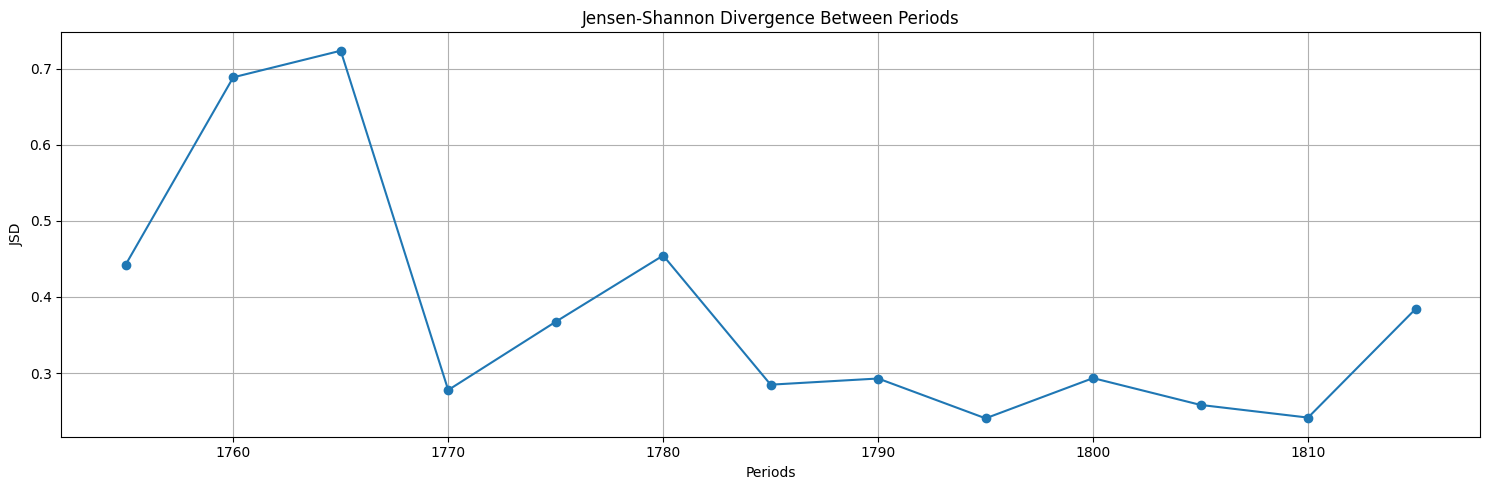

In [18]:
plot_jsd_by_period(sfillers_js_results)

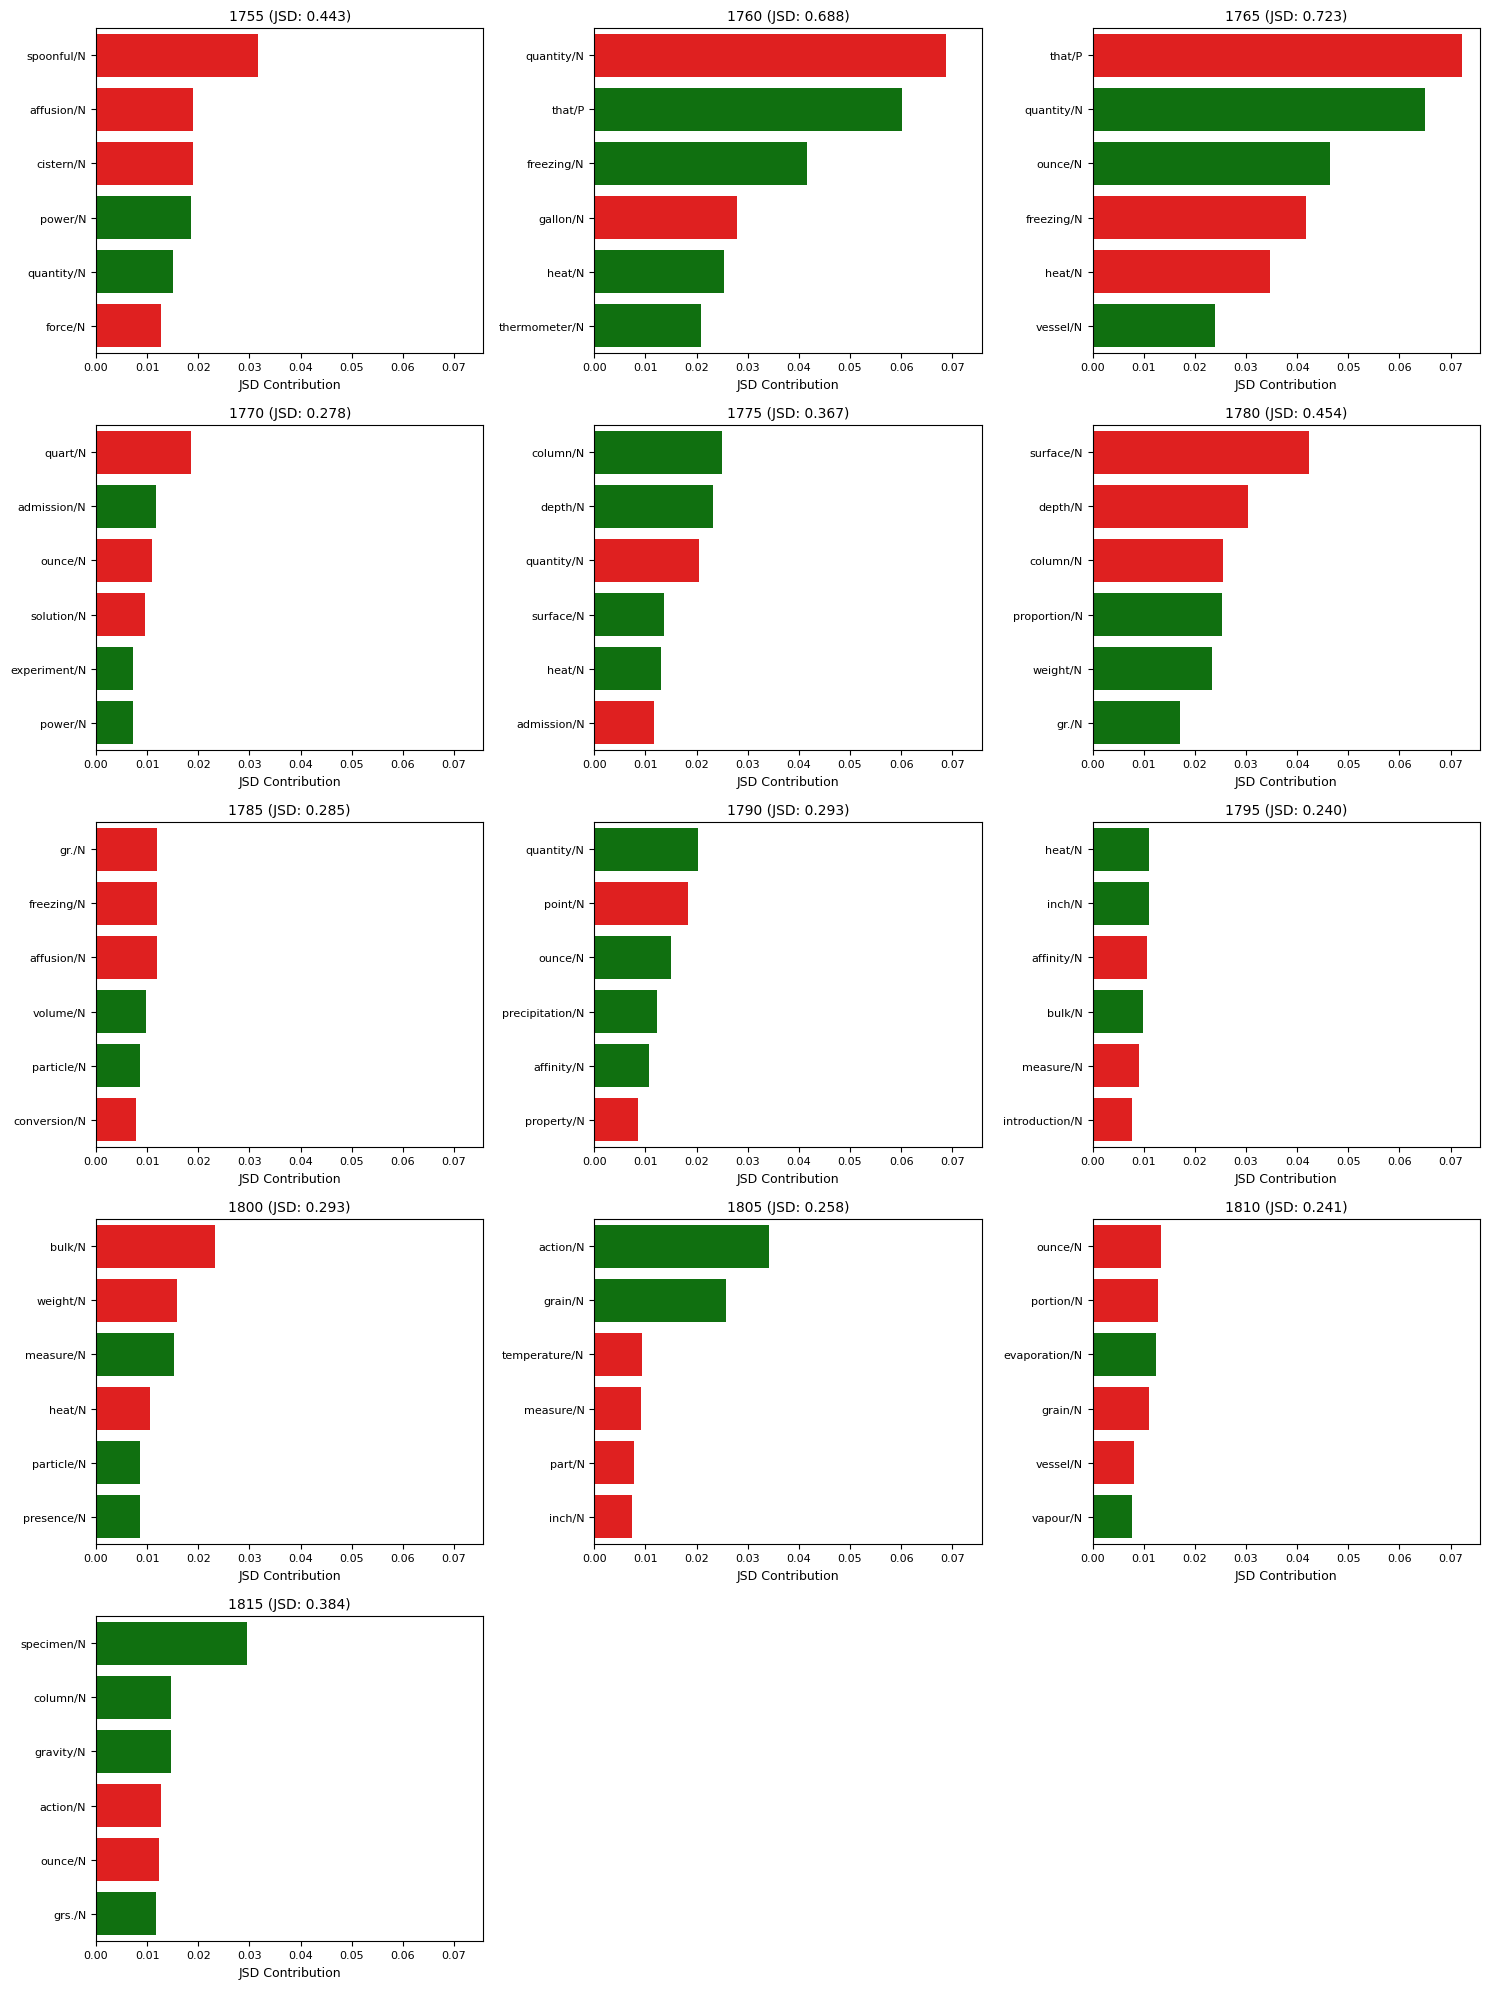

In [19]:
plot_items_jsd_by_period(sfillers_js_results, top_n=6, cols=3)